# 3. Introduction to Plotting

Anscombe data is 4 sets of data with two datasets, and it's hard to see the trends from the data

In [4]:
import seaborn as sns
anscombe = sns.load_dataset("anscombe")

print("Checking the data out with pandas, doesn't look too different!")
import pandas as pd
pda = pd.DataFrame(anscombe)
pda.groupby('dataset').describe()

Checking the data out with pandas, doesn't look too different!


x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

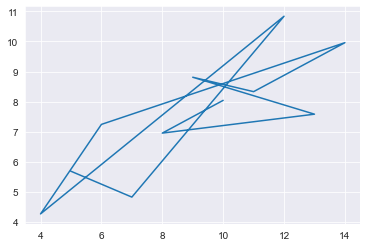

In [152]:
import matplotlib.pyplot as plt
dataset_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])


Ew, let's try it with o


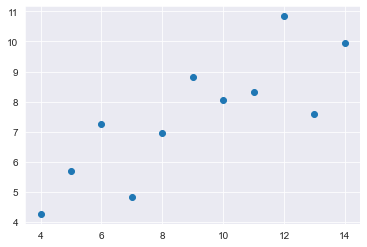

In [153]:
print("Ew, let's try it with o")
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

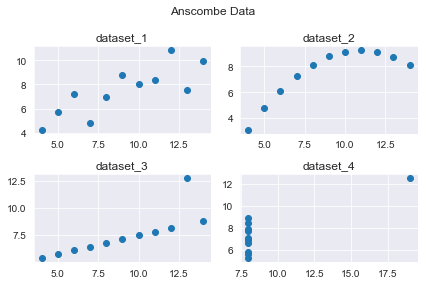

In [154]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")
fig.suptitle("Anscombe Data")
fig.tight_layout()

## More info on matplotlib

This is really good:
https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure

The biggest parts are that a Figure contains 1 or more Axes, which contains Axis

Now let's look at a univirate plot

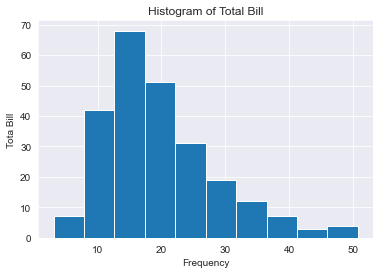

In [155]:
tips = sns.load_dataset("tips")

tips.groupby('smoker').describe()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Tota Bill')
fig.show()

## Bivirate data

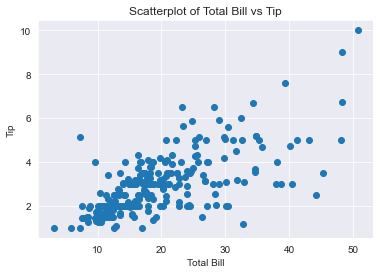

In [156]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot.show()

## Box plots

For when a discrete variable is plotted against a continuous variable

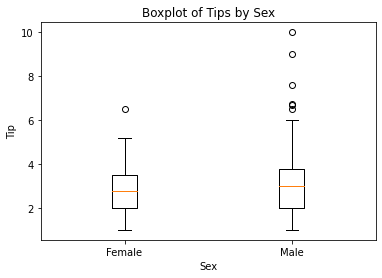

In [7]:
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(
    [
        tips[tips['sex'] == 'Female']['tip'],
        tips[tips['sex'] == 'Male']['tip']
    ],
    labels = ['Female', 'Male']
)
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')
boxplot.show()

## Multivariate Data

There is no standard for multi-variate data, you may change the color or size of the data points, but generally color is preferred.

Matlib and Seaborn come with good built-in color palettes and tools for choosing good colors.

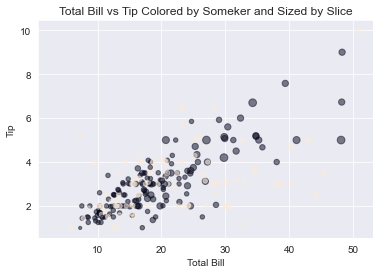

In [158]:
def recode(field):
    if field == 'No':
        return 0
    else:
        return 1

tips['color'] = tips['smoker'].apply(recode)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,
    c = tips['color'],
    alpha=.5
)

axes1.set_title('Total Bill vs Tip Colored by Someker and Sized by Slice')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot.show()

In [159]:
## Seaborn

Seaborn is a higher level library that wraps matplotlib, and makes complex visualizations easier.

It's tightly integrated and frequently used with PyData

Note: the version of seaborn in the book is old, so things aren't quite right

SyntaxError: invalid syntax (<ipython-input-159-fae19d686a5c>, line 3)

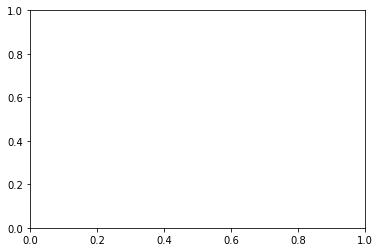

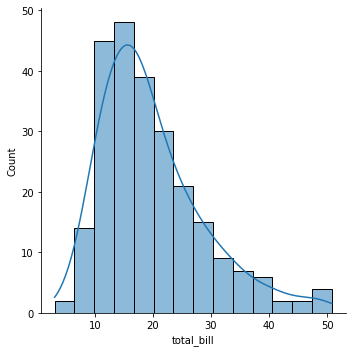

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

# ooh, python can return multiple items? or is this a tuple?
hist, ax = plt.subplots()
ax = sns.displot(tips['total_bill'], kde=True)
ax.set_titles(["Total Bill Histogram with Density"])
plt.show()


<class 'pandas.core.frame.DataFrame'>


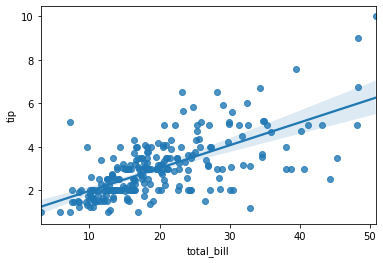

In [26]:
scatter, ax = plt.subplots()

ax = sns.regplot(x='total_bill', y='tip', data=tips)

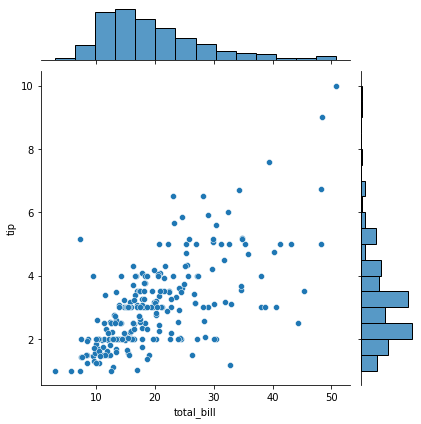

In [27]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)

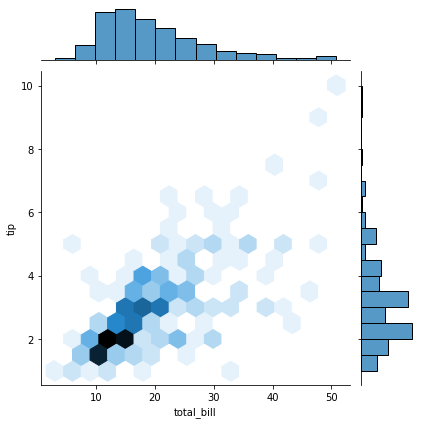

In [28]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind="hex")

Violin Plots are basically box plots,that also show the distribution


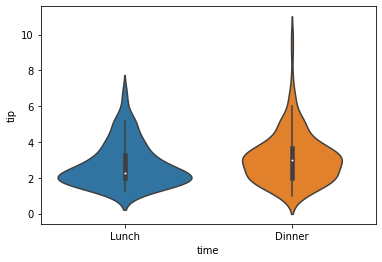

In [35]:
print("Violin Plots are basically box plots,that also show the distribution")
violin = sns.violinplot(x='time', y='tip', data=tips, kind="hex")

Pair plot is great for comparing numeric values. You get a bar chart for each individual value, and then a matrix that relates each combination
The downside is you have some redundant information, for example total_bill x tip and ip x total_bill - we can use a PairGrid to manually change the types of charts we want


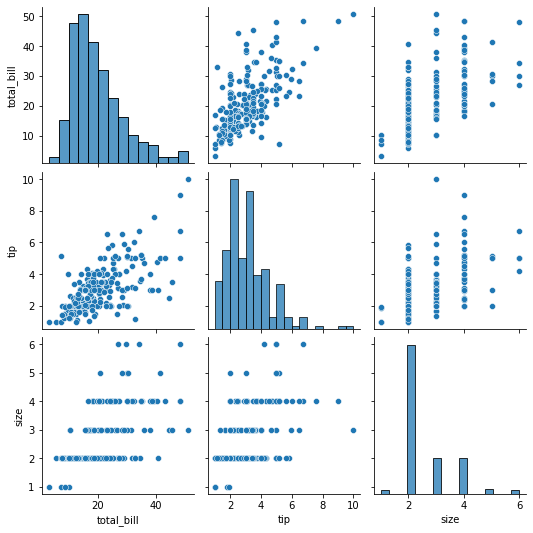

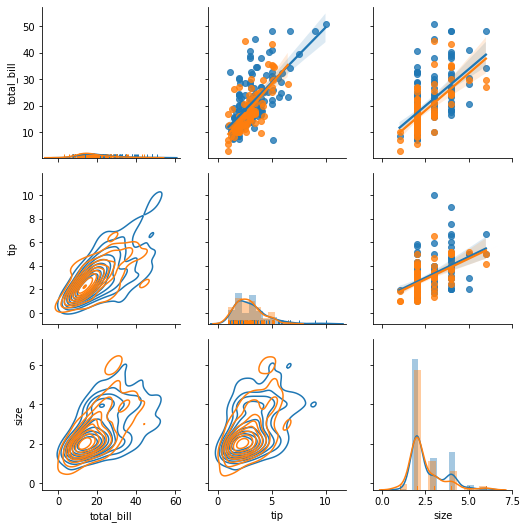

In [43]:
print("Pair plot is great for comparing numeric values. You get a bar chart for each individual value, and then a matrix that relates each combination")
fig = sns.pairplot(tips)
print("The downside is you have some redundant information, for example total_bill x tip and ip x total_bill - we can use a PairGrid to manually change the types of charts we want")
pair_grid = sns.PairGrid(tips, hue='sex')
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

## Facets

- Each variable is a column
- Each observation is a row
- Each type of observational unit is a table

Read more about [tidy data](TODO Read up on data:https://vita.had.co.nz/papers/tidy-data.pdf)

(Observational unit just seems like normalization)


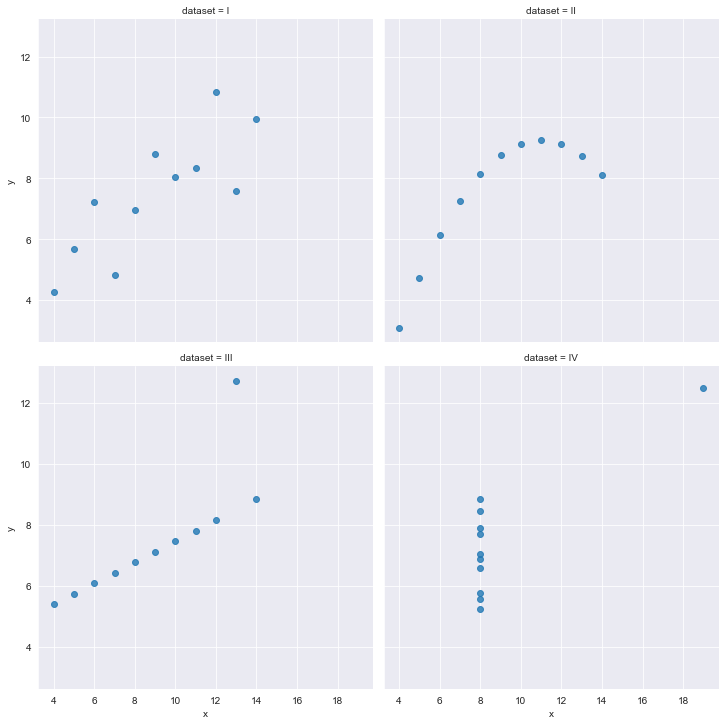

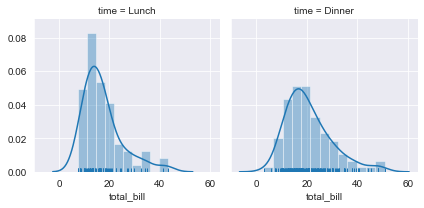

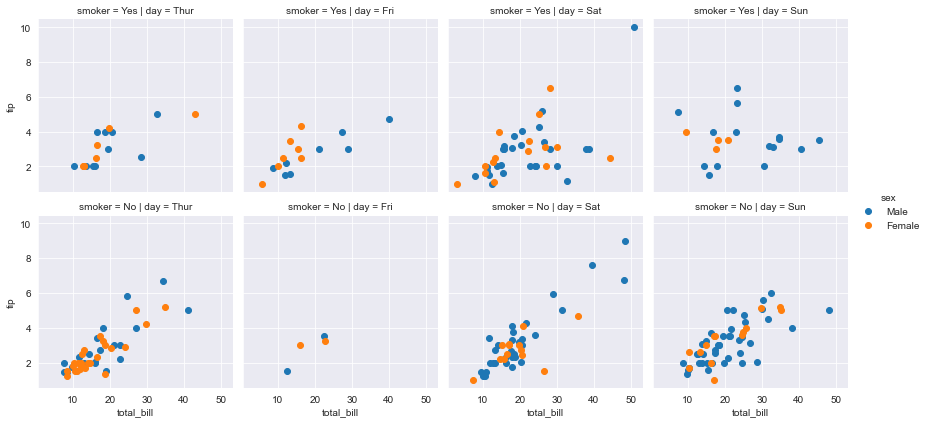

In [160]:
import seaborn as sns
sns.set_style('darkgrid')
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot,'total_bill', rug=True)

facet = sns.FacetGrid(tips, col='day', row='smoker', hue='sex')
facet.map(plt.scatter,'total_bill', 'tip')
facet.add_legend()




In [ ]:
## Bar Charts

Skipping lots of charts in 3.4, especially 3.5 - but hex is too cool.

Making the gridsize larger, makes the hexes smaller. (number of hexagons in the x direction)



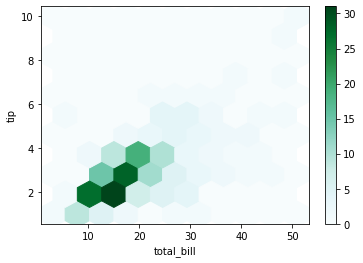

Note: explicitly passing the ax only draws one plot


In [124]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)
plt.show()
print("Note: explicitly passing the ax only draws one plot")def times_100(b):
    return b * 100

In [135]:
# Experimenting with Lambdas
def times_100(b):
    return b * 100

# times_100_partDeux = b => b * 100
times_100_partDeux = lambda b: b * 10b0

bills = list(tips['total_bill'])

bigger_bills = map(times_100_partDeux, bills)

print(list(bigger_bills))



[1698.9999999999998, 1034.0, 2101.0, 2368.0, 2459.0, 2529.0, 877.0, 2688.0, 1504.0, 1478.0, 1027.0, 3526.0, 1542.0, 1843.0, 1483.0, 2158.0, 1033.0, 1629.0, 1697.0, 2065.0, 1792.0000000000002, 2029.0, 1577.0, 3942.0, 1982.0, 1780.9999999999998, 1337.0, 1269.0, 2170.0, 1964.9999999999998, 955.0000000000001, 1835.0000000000002, 1506.0, 2069.0, 1778.0, 2406.0, 1630.9999999999998, 1693.0, 1869.0000000000002, 3127.0, 1604.0, 1746.0, 1394.0, 968.0, 3040.0, 1829.0, 2223.0, 3240.0, 2855.0, 1804.0, 1254.0, 1029.0, 3481.0, 994.0, 2556.0, 1948.9999999999998, 3801.0, 2641.0, 1124.0, 4827.0, 2029.0, 1381.0, 1102.0, 1829.0, 1759.0, 2007.9999999999998, 1645.0, 307.0, 2023.0, 1501.0, 1202.0, 1707.0, 2686.0, 2528.0, 1473.0, 1051.0, 1792.0000000000002, 2720.0, 2276.0, 1729.0, 1944.0000000000002, 1666.0, 1007.0, 3268.0, 1598.0, 3483.0, 1303.0, 1828.0, 2471.0, 2116.0, 2897.0, 2249.0, 575.0, 1632.0, 2275.0, 4017.0, 2728.0, 1203.0, 2101.0, 1246.0, 1135.0, 1538.0, 4430.0, 2242.0, 2092.0, 1536.0, 2049.0, 2521.

## Themes

You can change the theme, once usually at the top

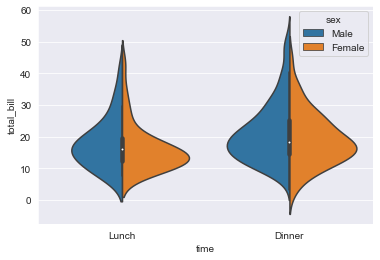

In [166]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

## Conclusion

### Resources:

- http://seaborn.pydata.org/api.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
- https://matplotlib.org/api/index.html